In [1]:
# Dataset 2 : Movies

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# Feature selection
from sklearn.random_projection import GaussianRandomProjection
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

In [2]:
# preprocessing StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the object 
scaler = StandardScaler()
# Calculate the mean and the standard deviation
scaler.fit(X)
# Transform the values
X_scaled = scaler.transform(X)

(1300, 8)
(1300, 8)
(1300, 8)
(1300, 8)
(1300, 8)
(1300, 8)
(1300, 8)
(1300, 8)
time for running the algorithm = 0.03858342900275602 s


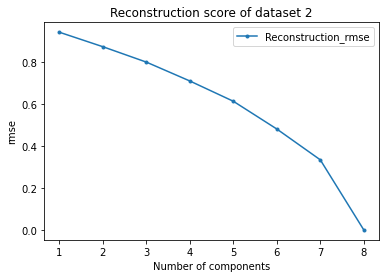

In [6]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

time1 = time.perf_counter()

Reconstruction_rmse = []

#calculate RMSE
for i in range(1,9):
    grp = GaussianRandomProjection(n_components = i,random_state = 42)
    X_grp = grp.fit_transform(X_scaled)
    X_back = grp.inverse_transform(X_grp)
    print(X_back.shape)
    Reconstruction_rmse.append(sqrt(mean_squared_error(X_back,X_scaled)))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_clusters = [i for i in range(1,9)]
fig, ax = plt.subplots()
ax.set_title('Reconstruction score of dataset 2')
ax.set_xlabel('Number of components')
ax.set_ylabel('rmse')
ax.plot(number_of_clusters, Reconstruction_rmse, marker=".", label="Reconstruction_rmse")
ax.legend()
plt.show()

In [10]:
grp = GaussianRandomProjection(n_components = 8,random_state = 42)
X_grp = grp.fit_transform(X_scaled)
print(X_grp.shape)

(1300, 8)


In [12]:
# New dataframe

df_new = pd.DataFrame(X_grp, columns =['PC1','PC2','PC3','PC4','PC5'
                                         ,'PC6','PC7','PC8'] )
df_new = df_new.drop(columns=['PC8'])

df_new['Awards'] = df.Awards
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Awards
0,-0.320857,1.621399,-1.552120,0.638862,2.545385,2.099864,-0.023808,0
1,-0.704362,1.910944,-0.935956,1.250628,2.056800,2.080472,-0.300652,0
2,0.021072,1.564530,0.065466,1.260807,1.378952,0.358339,-0.692125,0
3,-1.037906,1.749980,1.242438,-0.331798,1.068584,0.717149,-0.799427,0
4,-0.202053,1.252274,0.658773,-0.168924,0.945020,0.277124,-0.296374,0


In [14]:
# save the data
df_new.to_csv('Movie_grp.csv', index=False)